In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/anxiety-attack-factors-symptoms-and-severity/anxiety_attack_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/anxiety-attack-factors-symptoms-and-severity/anxiety_attack_dataset.csv")

In [3]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [5]:
df.pop('ID')

0            1
1            2
2            3
3            4
4            5
         ...  
11995    11996
11996    11997
11997    11998
11998    11999
11999    12000
Name: ID, Length: 12000, dtype: int64

# Analise Exploratória dos Dados

Nosso objetivo aqui é buscar entender através dos dados algumas informações sobre os ataques de ansiedade:
1. Vamos ver as frequências das colunas do dataset, informações mais detalhadas (relacionadas a quantidades) sobre os gráficos podem ser encontrados na linha abaixo;
2. Depois vamos relacionar as colunas analisadas com o uso da medicação, podemos tirar dados estatísticos daqui.
(**Exemplo**: *Sabemos que temos 246 pessoas com 18 anos, dessas apenas 48 tomam medicação, logo 48/246 ≃ 19.52% tomam medicação e (246-48)/246 ≃ 80.48% não tomam medicação***)

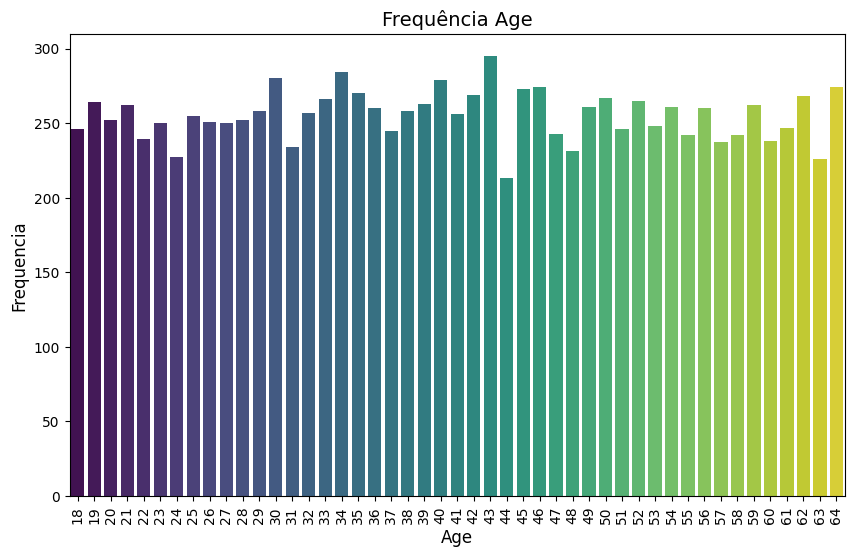

Frequência da coluna Age:
    Age  Frequencia
0    43         295
1    34         284
2    30         280
3    40         279
4    46         274
5    64         274
6    45         273
7    35         270
8    42         269
9    62         268
10   50         267
11   33         266
12   52         265
13   19         264
14   39         263
15   59         262
16   21         262
17   54         261
18   49         261
19   56         260
20   36         260
21   29         258
22   38         258
23   32         257
24   41         256
25   25         255
26   20         252
27   28         252
28   26         251
29   27         250
30   23         250
31   53         248
32   61         247
33   18         246
34   51         246
35   37         245
36   47         243
37   58         242
38   55         242
39   22         239
40   60         238
41   57         237
42   31         234
43   48         231
44   24         227
45   63         226
46   44         213


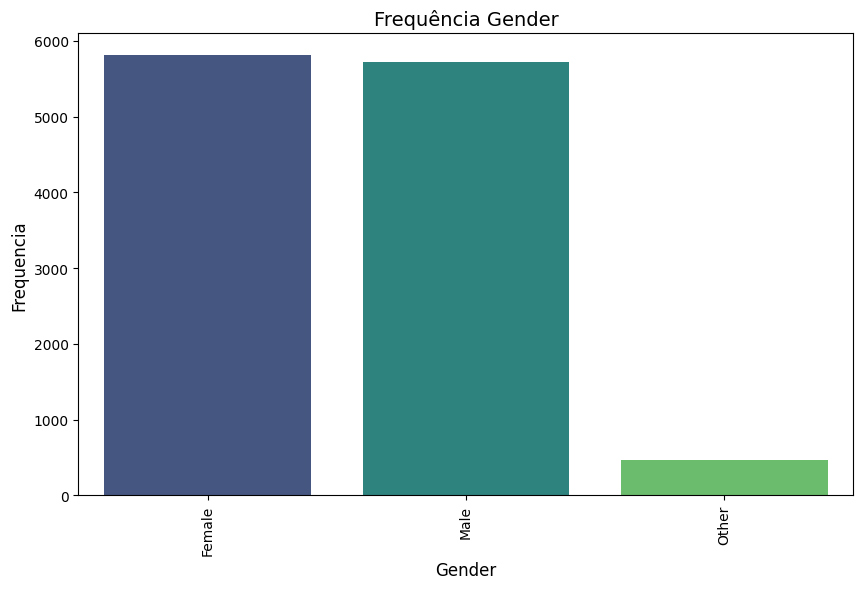

Frequência da coluna Gender:
   Gender  Frequencia
0  Female        5809
1    Male        5723
2   Other         468


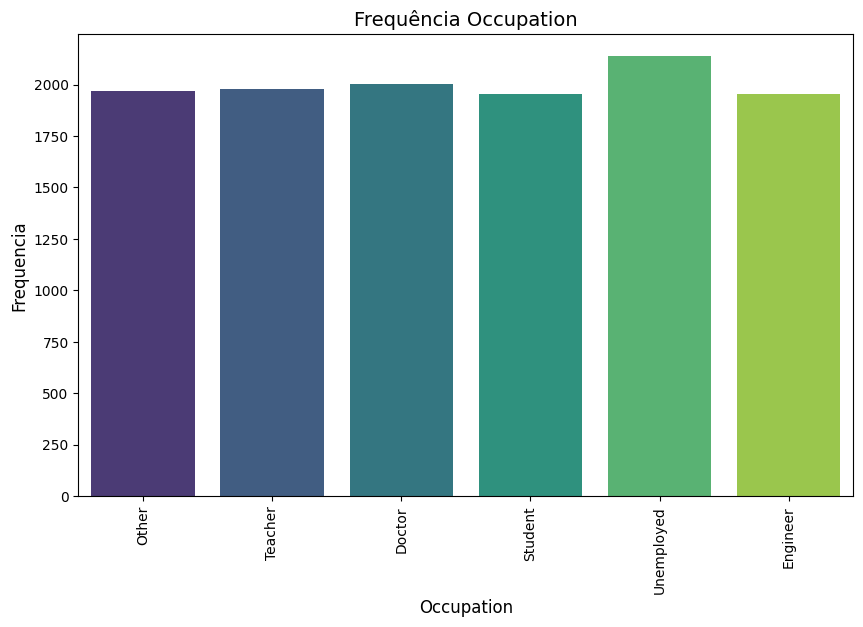

Frequência da coluna Occupation:
   Occupation  Frequencia
0  Unemployed        2139
1      Doctor        2004
2     Teacher        1980
3       Other        1971
4     Student        1953
5    Engineer        1953


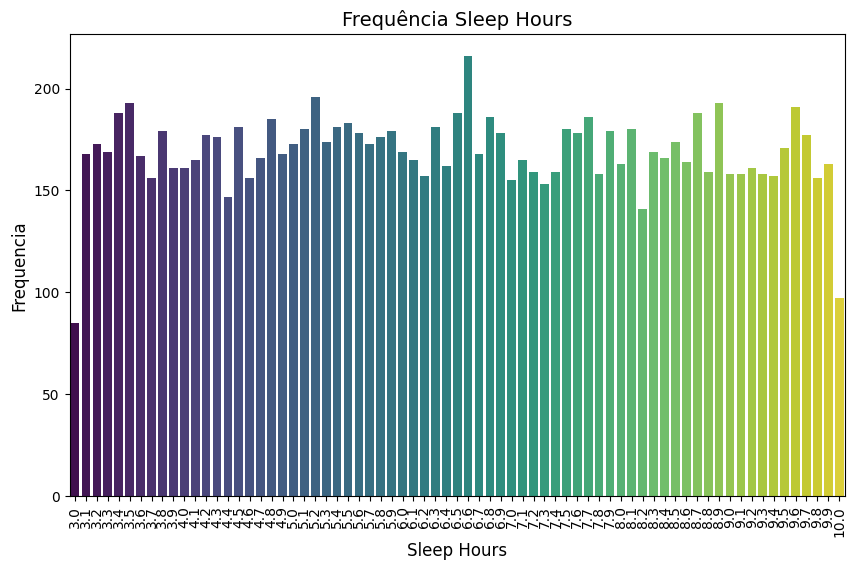

Frequência da coluna Sleep Hours:
    Sleep Hours  Frequencia
0           6.6         216
1           5.2         196
2           3.5         193
3           8.9         193
4           9.6         191
..          ...         ...
66          7.3         153
67          4.4         147
68          8.2         141
69         10.0          97
70          3.0          85

[71 rows x 2 columns]


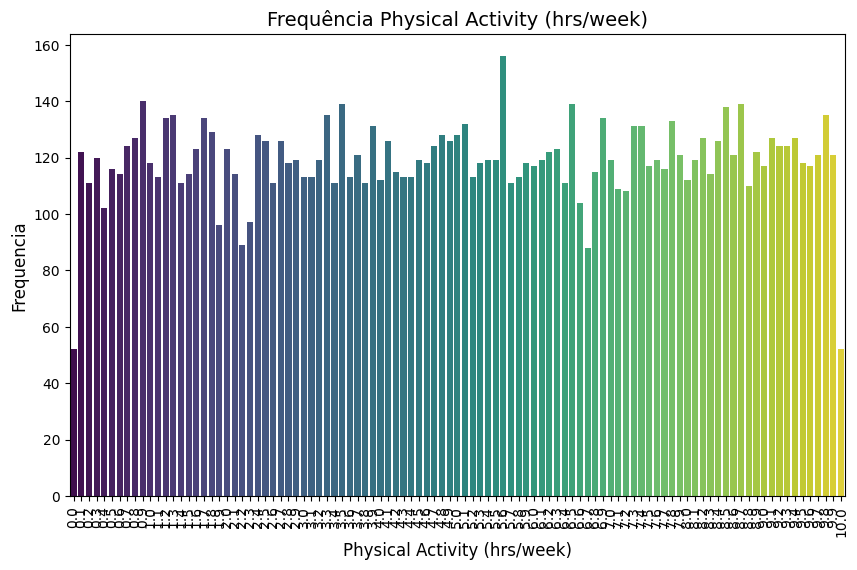

Frequência da coluna Physical Activity (hrs/week):
     Physical Activity (hrs/week)  Frequencia
0                             5.6         156
1                             0.9         140
2                             8.7         139
3                             6.5         139
4                             3.5         139
..                            ...         ...
96                            1.9          96
97                            2.2          89
98                            6.7          88
99                            0.0          52
100                          10.0          52

[101 rows x 2 columns]


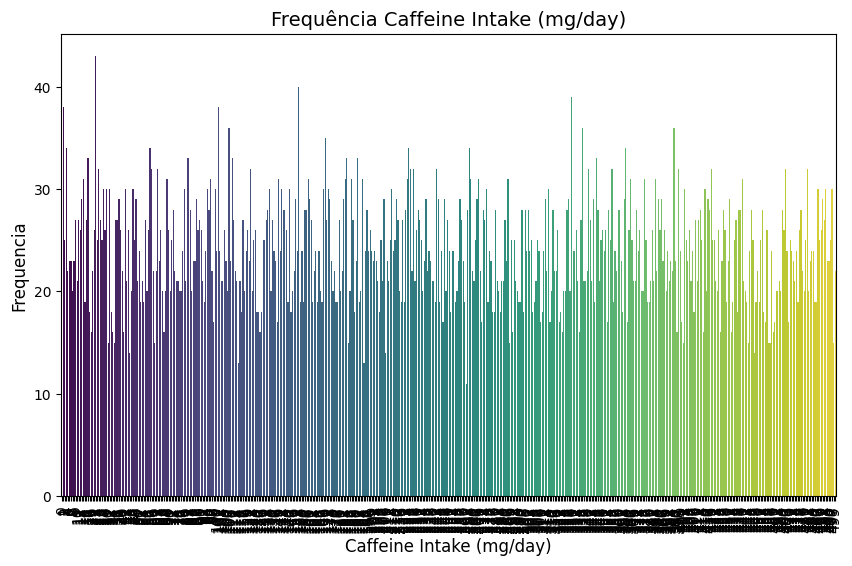

Frequência da coluna Caffeine Intake (mg/day):
     Caffeine Intake (mg/day)  Frequencia
0                          22          43
1                         153          40
2                         329          39
3                           1          38
4                         101          38
..                        ...         ...
495                       447          14
496                       209          14
497                       195          13
498                       114          13
499                       261          11

[500 rows x 2 columns]


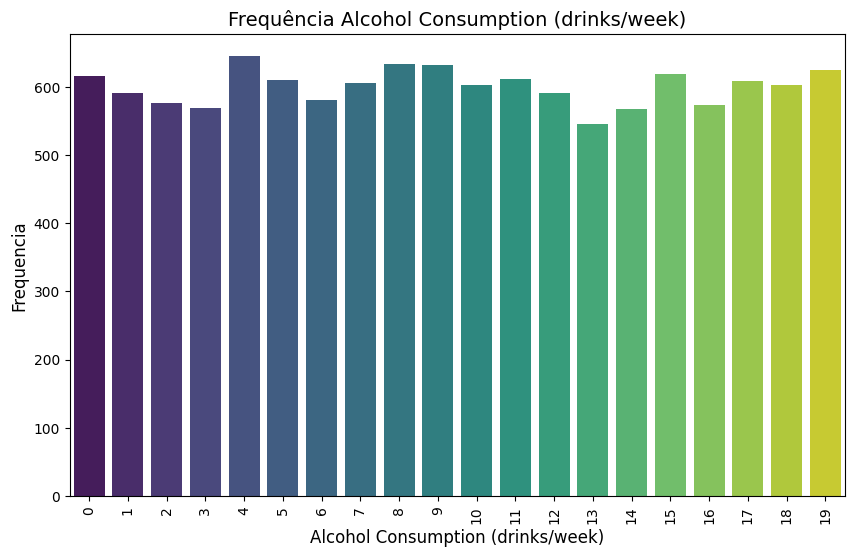

Frequência da coluna Alcohol Consumption (drinks/week):
    Alcohol Consumption (drinks/week)  Frequencia
0                                   4         645
1                                   8         633
2                                   9         632
3                                  19         625
4                                  15         619
5                                   0         615
6                                  11         611
7                                   5         610
8                                  17         608
9                                   7         605
10                                 10         603
11                                 18         602
12                                  1         591
13                                 12         590
14                                  6         580
15                                  2         576
16                                 16         573
17                                  3       

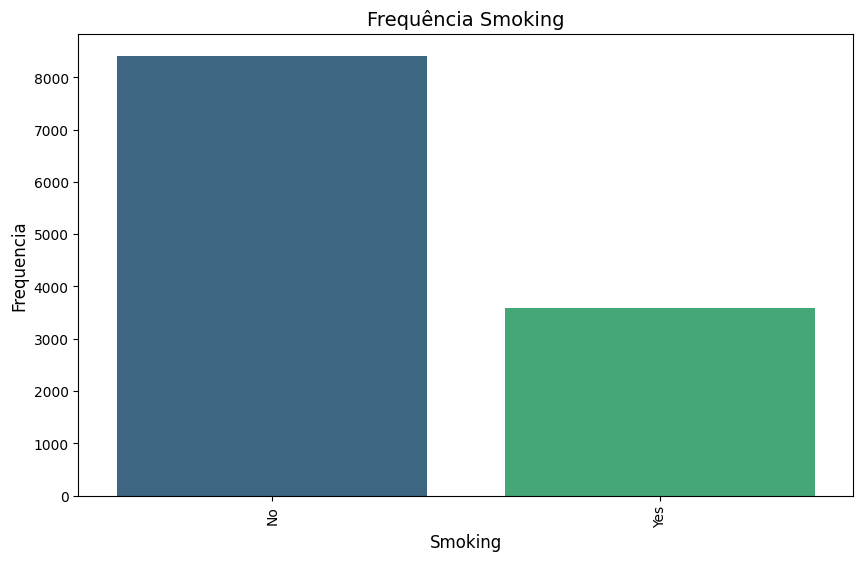

Frequência da coluna Smoking:
  Smoking  Frequencia
0      No        8417
1     Yes        3583


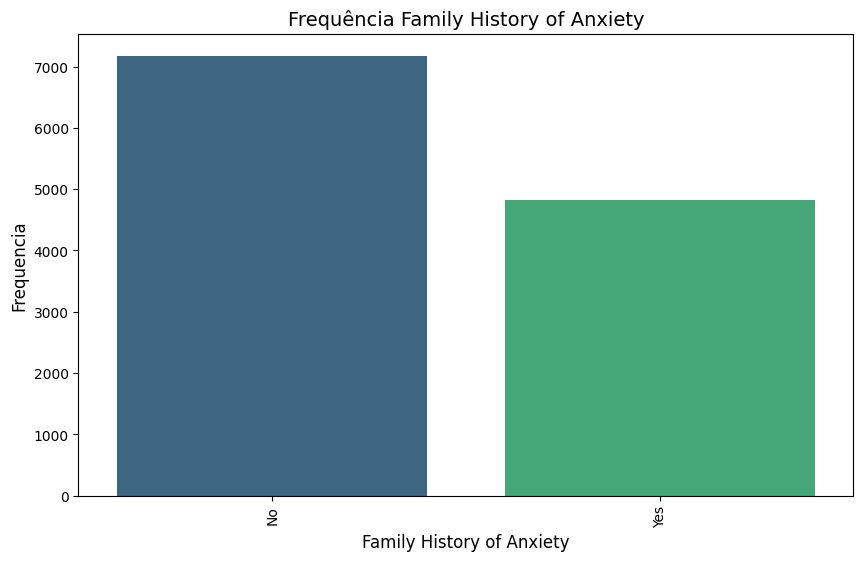

Frequência da coluna Family History of Anxiety:
  Family History of Anxiety  Frequencia
0                        No        7179
1                       Yes        4821


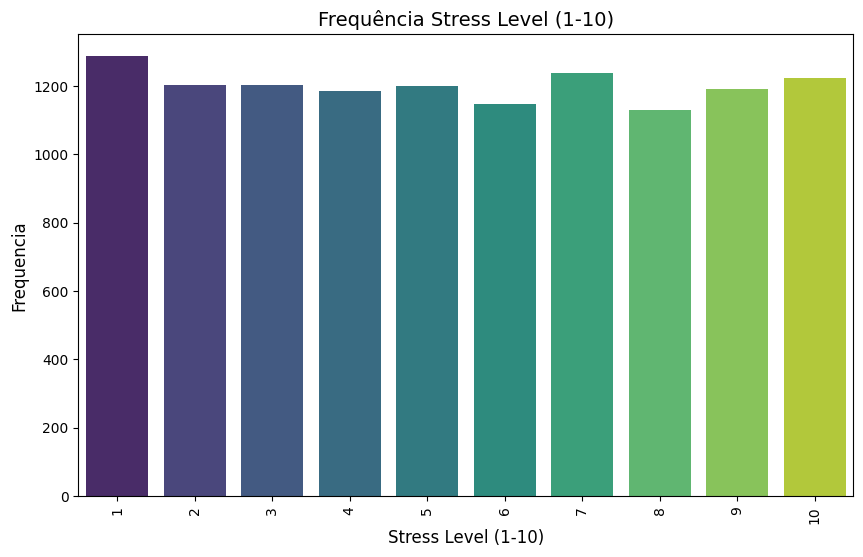

Frequência da coluna Stress Level (1-10):
   Stress Level (1-10)  Frequencia
0                    1        1287
1                    7        1238
2                   10        1224
3                    3        1201
4                    2        1201
5                    5        1199
6                    9        1190
7                    4        1186
8                    6        1146
9                    8        1128


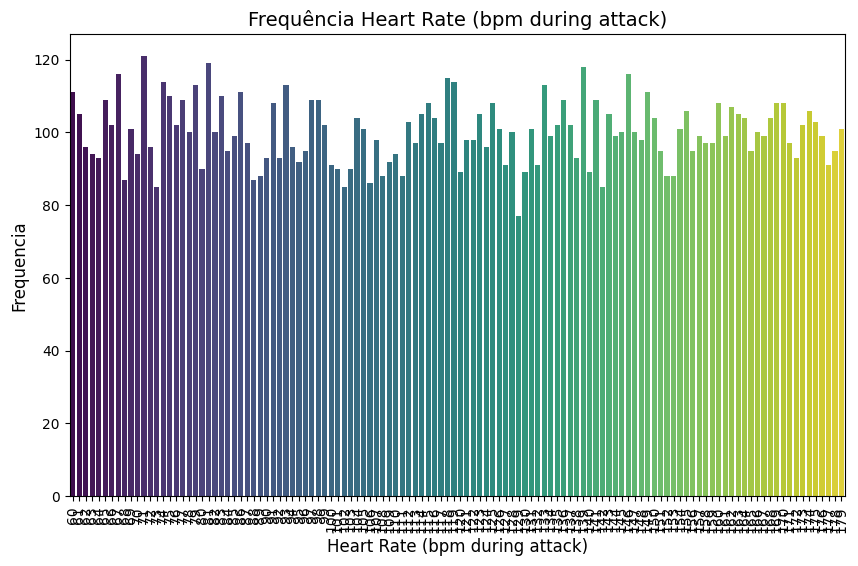

Frequência da coluna Heart Rate (bpm during attack):
     Heart Rate (bpm during attack)  Frequencia
0                                71         121
1                                81         119
2                               139         118
3                               146         116
4                                67         116
..                              ...         ...
115                             106          86
116                             102          85
117                             142          85
118                              73          85
119                             129          77

[120 rows x 2 columns]


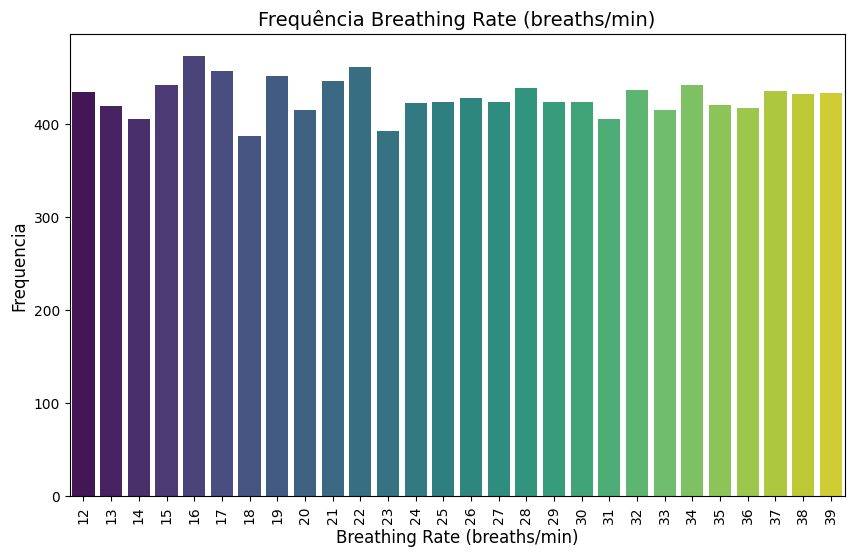

Frequência da coluna Breathing Rate (breaths/min):
    Breathing Rate (breaths/min)  Frequencia
0                             16         473
1                             22         461
2                             17         457
3                             19         451
4                             21         446
5                             34         442
6                             15         442
7                             28         439
8                             32         436
9                             37         435
10                            12         434
11                            39         433
12                            38         432
13                            26         428
14                            27         424
15                            29         424
16                            30         423
17                            25         423
18                            24         422
19                            35         420
20  

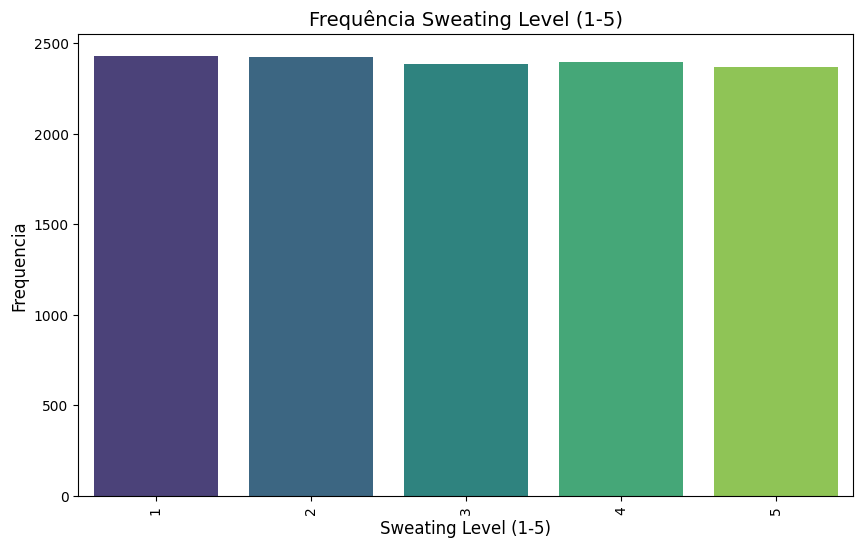

Frequência da coluna Sweating Level (1-5):
   Sweating Level (1-5)  Frequencia
0                     1        2429
1                     2        2425
2                     4        2396
3                     3        2382
4                     5        2368


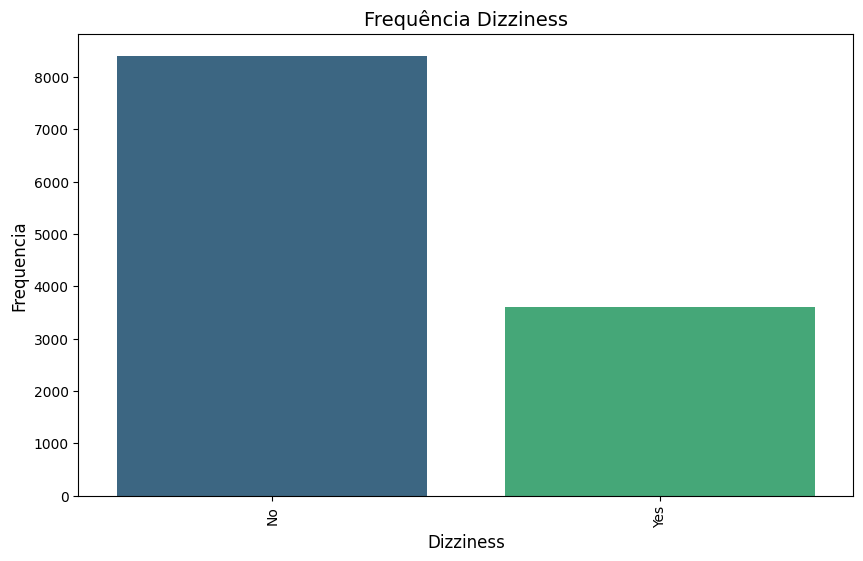

Frequência da coluna Dizziness:
  Dizziness  Frequencia
0        No        8406
1       Yes        3594


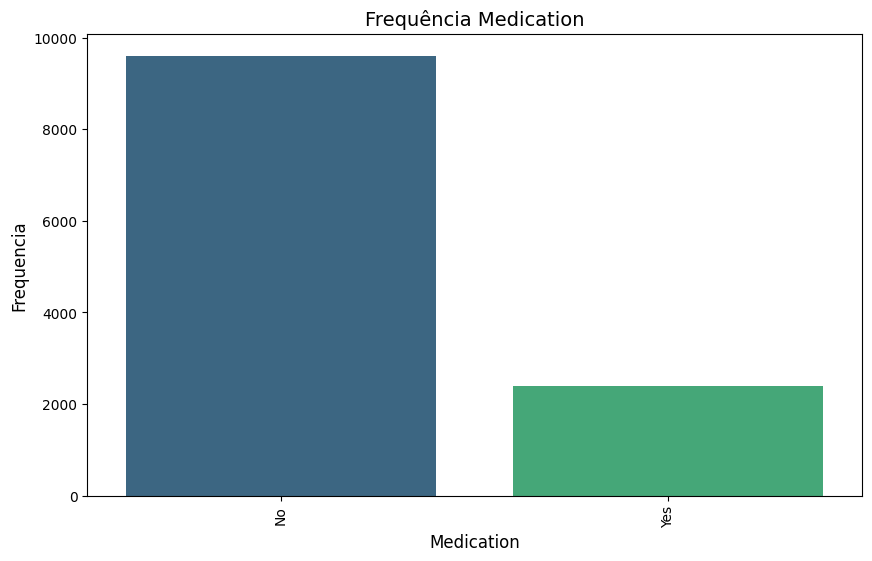

Frequência da coluna Medication:
  Medication  Frequencia
0         No        9605
1        Yes        2395


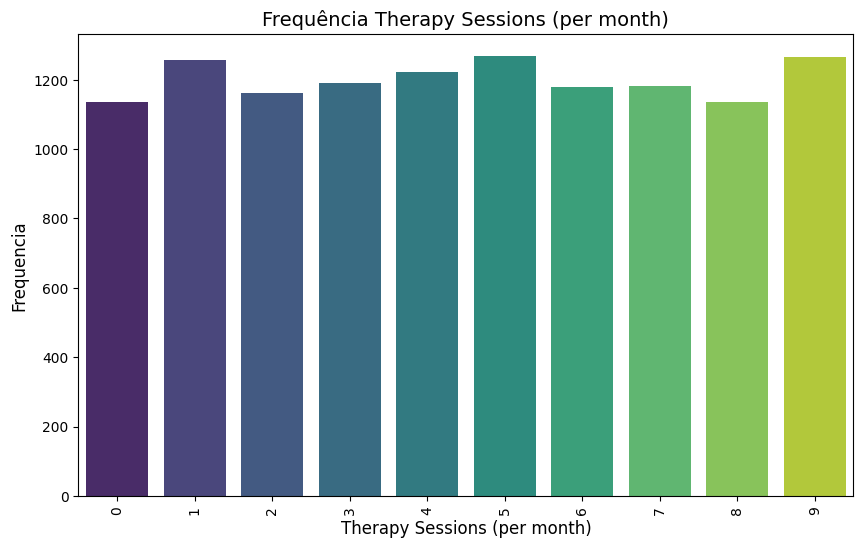

Frequência da coluna Therapy Sessions (per month):
   Therapy Sessions (per month)  Frequencia
0                             5        1269
1                             9        1267
2                             1        1258
3                             4        1223
4                             3        1190
5                             7        1181
6                             6        1179
7                             2        1162
8                             8        1136
9                             0        1135


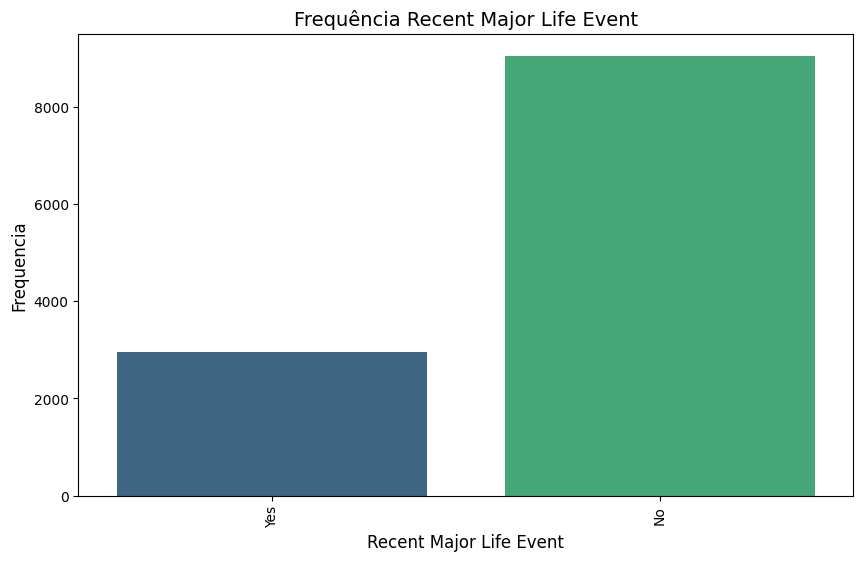

Frequência da coluna Recent Major Life Event:
  Recent Major Life Event  Frequencia
0                      No        9054
1                     Yes        2946


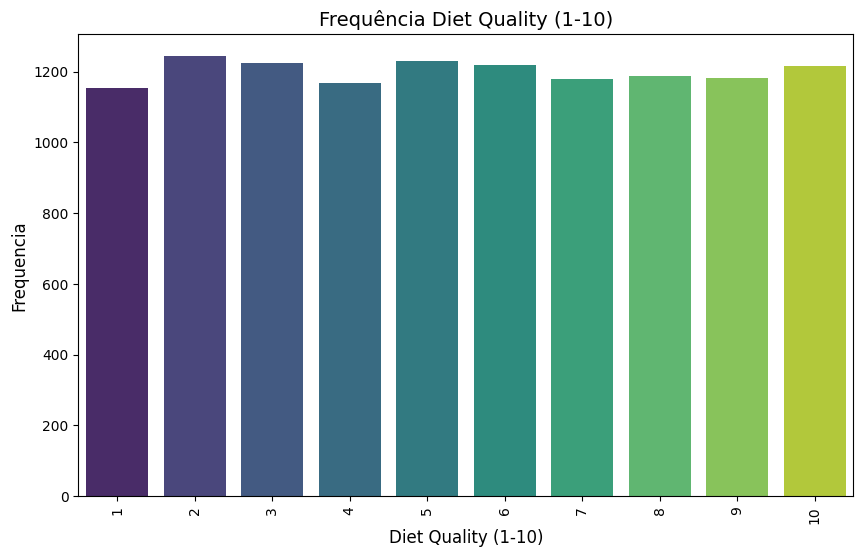

Frequência da coluna Diet Quality (1-10):
   Diet Quality (1-10)  Frequencia
0                    2        1244
1                    5        1229
2                    3        1225
3                    6        1218
4                   10        1215
5                    8        1188
6                    9        1181
7                    7        1178
8                    4        1167
9                    1        1155


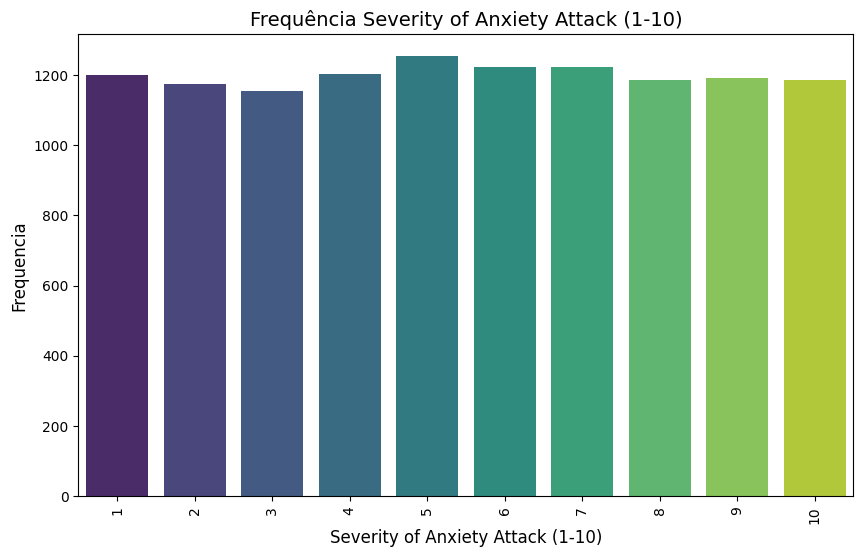

Frequência da coluna Severity of Anxiety Attack (1-10):
   Severity of Anxiety Attack (1-10)  Frequencia
0                                  5        1254
1                                  7        1224
2                                  6        1224
3                                  4        1202
4                                  1        1201
5                                  9        1191
6                                 10        1187
7                                  8        1187
8                                  2        1175
9                                  3        1155


In [6]:
for coluna in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequencia', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    qtd = df[coluna].value_counts().reset_index(name='Frequencia')
    qtd.columns = [coluna, 'Frequencia']
    print(f'Frequência da coluna {coluna}:')
    print(qtd)

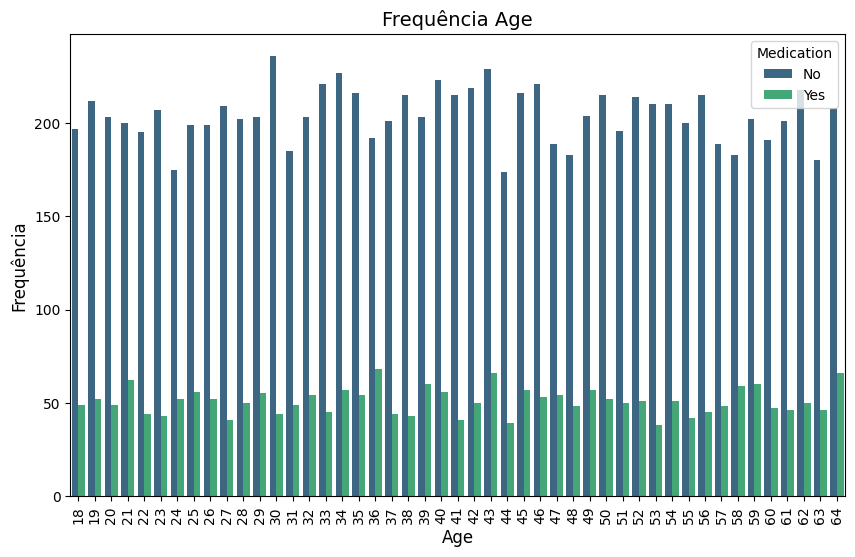

Frequência da coluna Age:
    Age Medication  Frequencia
0    18         No         197
1    18        Yes          49
2    19         No         212
3    19        Yes          52
4    20         No         203
..  ...        ...         ...
89   62        Yes          50
90   63         No         180
91   63        Yes          46
92   64         No         208
93   64        Yes          66

[94 rows x 3 columns]


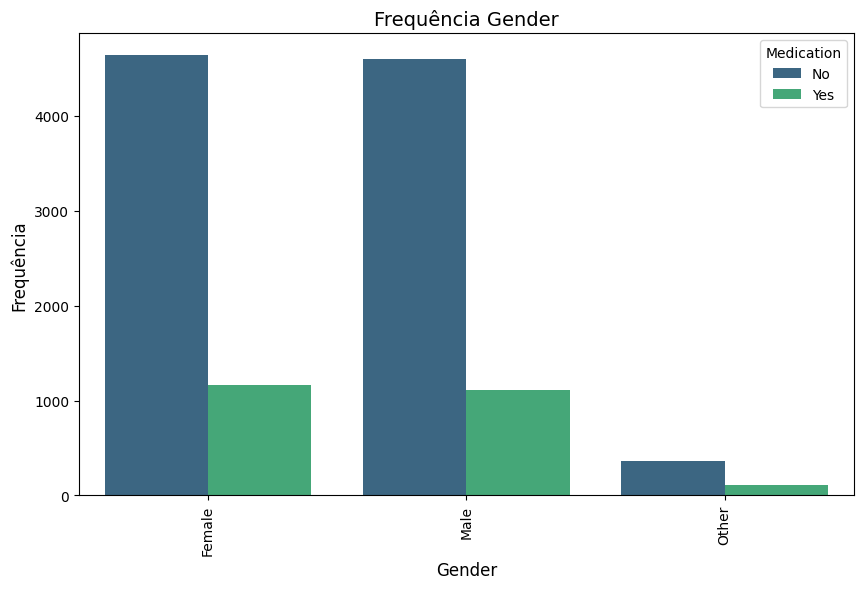

Frequência da coluna Gender:
   Gender Medication  Frequencia
0  Female         No        4639
1  Female        Yes        1170
2    Male         No        4606
3    Male        Yes        1117
4   Other         No         360
5   Other        Yes         108


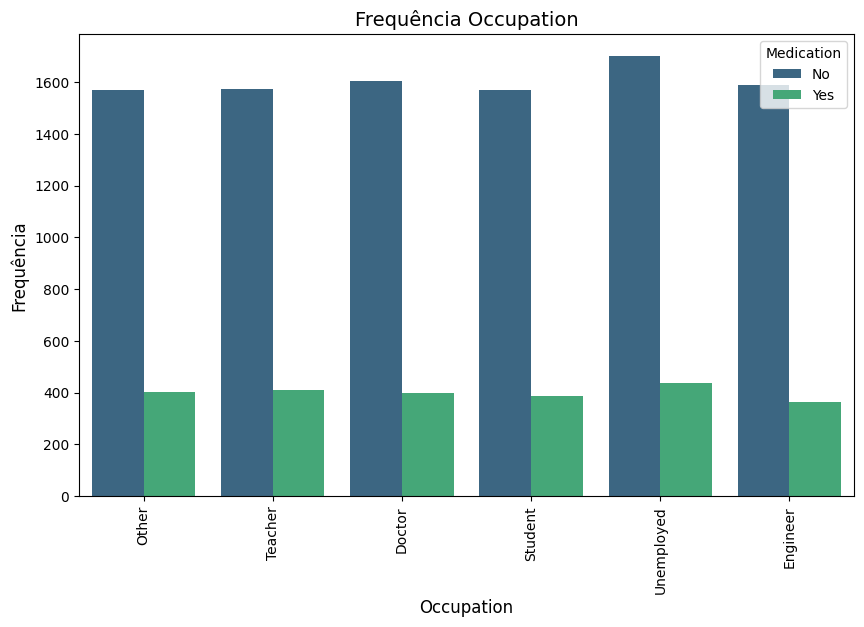

Frequência da coluna Occupation:
    Occupation Medication  Frequencia
0       Doctor         No        1606
1       Doctor        Yes         398
2     Engineer         No        1588
3     Engineer        Yes         365
4        Other         No        1570
5        Other        Yes         401
6      Student         No        1568
7      Student        Yes         385
8      Teacher         No        1572
9      Teacher        Yes         408
10  Unemployed         No        1701
11  Unemployed        Yes         438


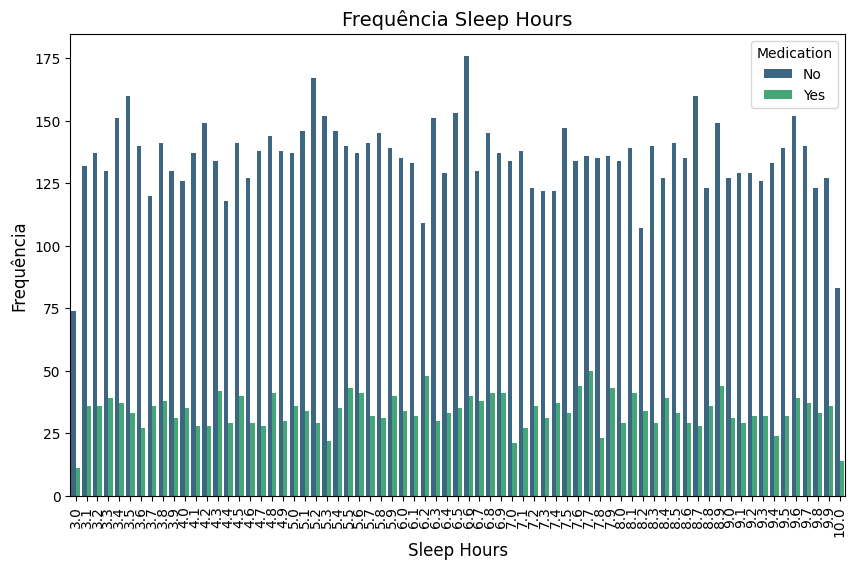

Frequência da coluna Sleep Hours:
     Sleep Hours Medication  Frequencia
0            3.0         No          74
1            3.0        Yes          11
2            3.1         No         132
3            3.1        Yes          36
4            3.2         No         137
..           ...        ...         ...
137          9.8        Yes          33
138          9.9         No         127
139          9.9        Yes          36
140         10.0         No          83
141         10.0        Yes          14

[142 rows x 3 columns]


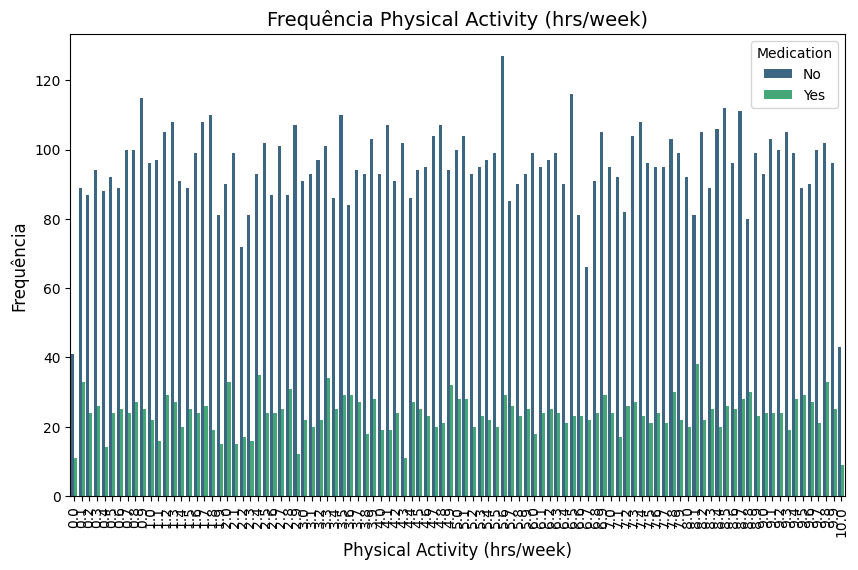

Frequência da coluna Physical Activity (hrs/week):
     Physical Activity (hrs/week) Medication  Frequencia
0                             0.0         No          41
1                             0.0        Yes          11
2                             0.1         No          89
3                             0.1        Yes          33
4                             0.2         No          87
..                            ...        ...         ...
197                           9.8        Yes          33
198                           9.9         No          96
199                           9.9        Yes          25
200                          10.0         No          43
201                          10.0        Yes           9

[202 rows x 3 columns]


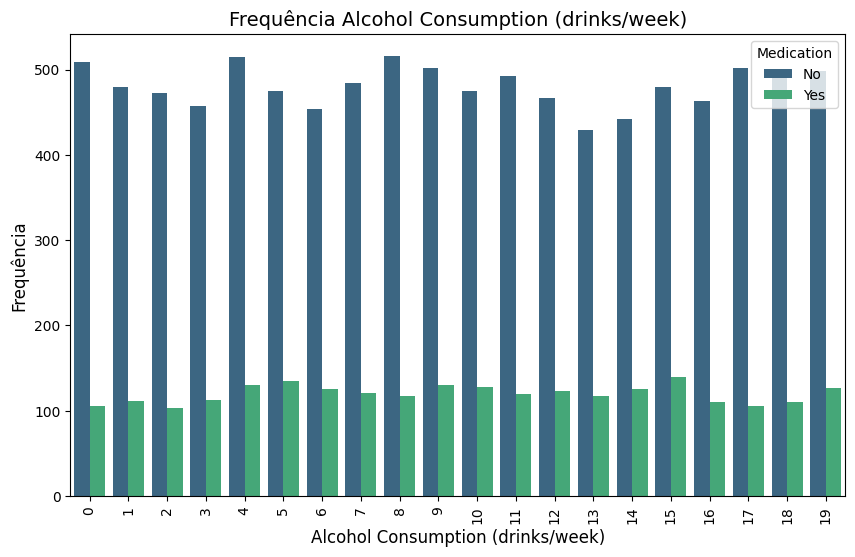

Frequência da coluna Alcohol Consumption (drinks/week):
    Alcohol Consumption (drinks/week) Medication  Frequencia
0                                   0         No         509
1                                   0        Yes         106
2                                   1         No         480
3                                   1        Yes         111
4                                   2         No         473
5                                   2        Yes         103
6                                   3         No         457
7                                   3        Yes         112
8                                   4         No         515
9                                   4        Yes         130
10                                  5         No         475
11                                  5        Yes         135
12                                  6         No         454
13                                  6        Yes         126
14                           

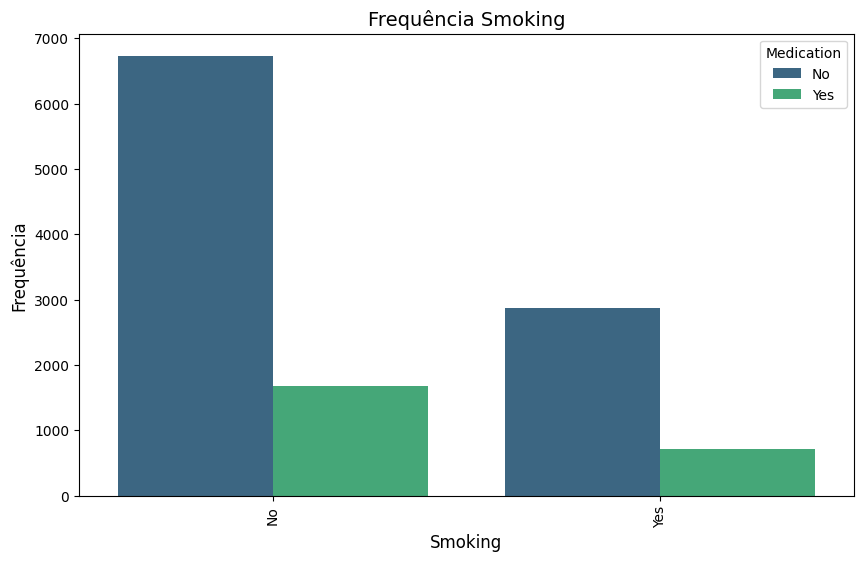

Frequência da coluna Smoking:
  Smoking Medication  Frequencia
0      No         No        6734
1      No        Yes        1683
2     Yes         No        2871
3     Yes        Yes         712


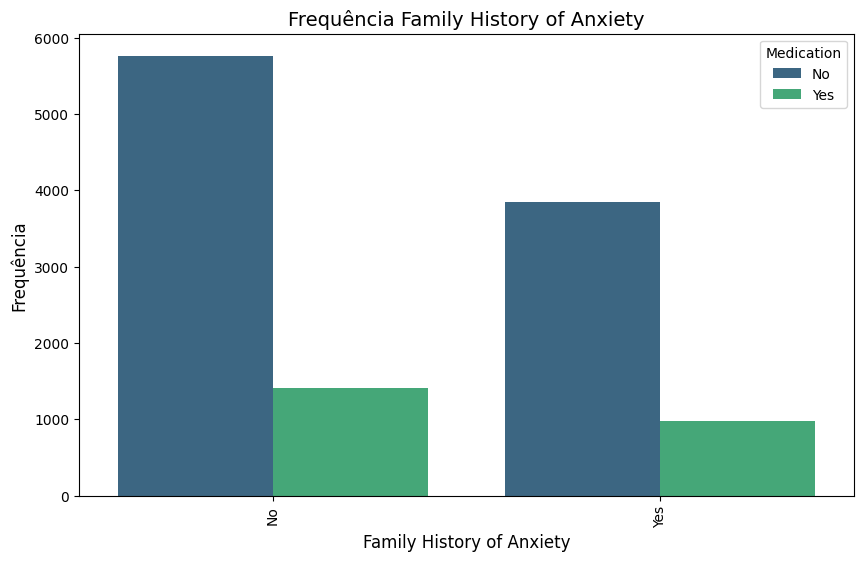

Frequência da coluna Family History of Anxiety:
  Family History of Anxiety Medication  Frequencia
0                        No         No        5764
1                        No        Yes        1415
2                       Yes         No        3841
3                       Yes        Yes         980


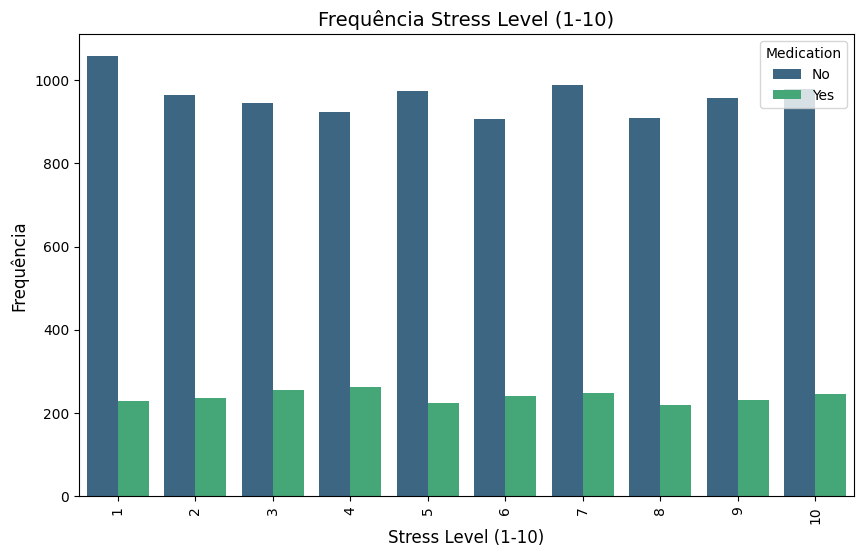

Frequência da coluna Stress Level (1-10):
    Stress Level (1-10) Medication  Frequencia
0                     1         No        1058
1                     1        Yes         229
2                     2         No         964
3                     2        Yes         237
4                     3         No         946
5                     3        Yes         255
6                     4         No         923
7                     4        Yes         263
8                     5         No         974
9                     5        Yes         225
10                    6         No         906
11                    6        Yes         240
12                    7         No         989
13                    7        Yes         249
14                    8         No         908
15                    8        Yes         220
16                    9         No         958
17                    9        Yes         232
18                   10         No         979
19                

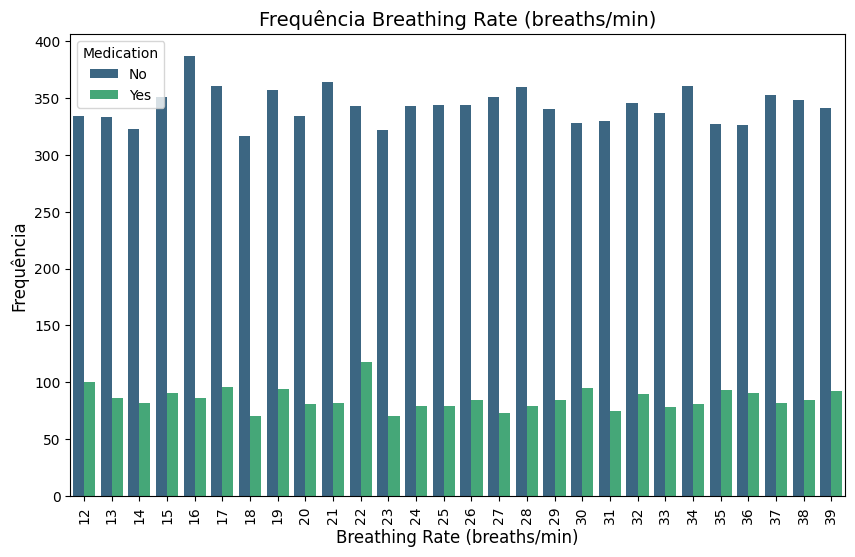

Frequência da coluna Breathing Rate (breaths/min):
    Breathing Rate (breaths/min) Medication  Frequencia
0                             12         No         334
1                             12        Yes         100
2                             13         No         333
3                             13        Yes          86
4                             14         No         323
5                             14        Yes          82
6                             15         No         351
7                             15        Yes          91
8                             16         No         387
9                             16        Yes          86
10                            17         No         361
11                            17        Yes          96
12                            18         No         317
13                            18        Yes          70
14                            19         No         357
15                            19        Yes          

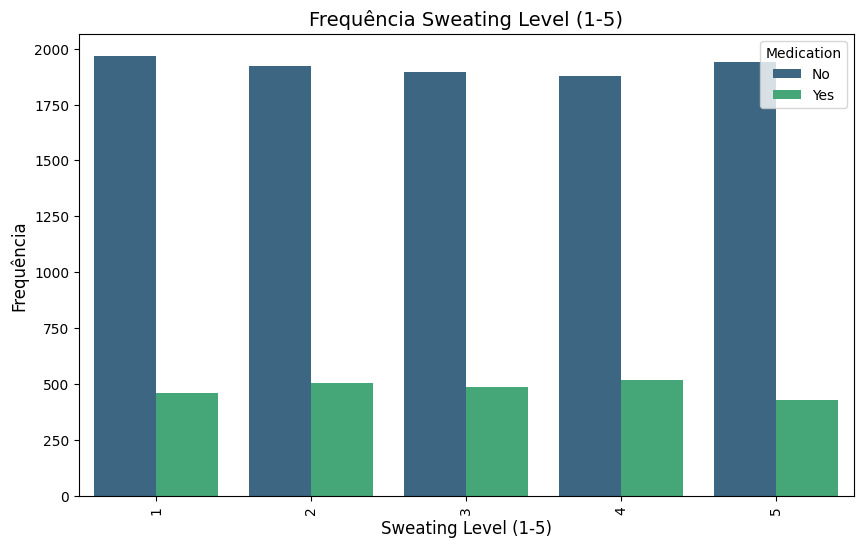

Frequência da coluna Sweating Level (1-5):
   Sweating Level (1-5) Medication  Frequencia
0                     1         No        1968
1                     1        Yes         461
2                     2         No        1922
3                     2        Yes         503
4                     3         No        1894
5                     3        Yes         488
6                     4         No        1880
7                     4        Yes         516
8                     5         No        1941
9                     5        Yes         427


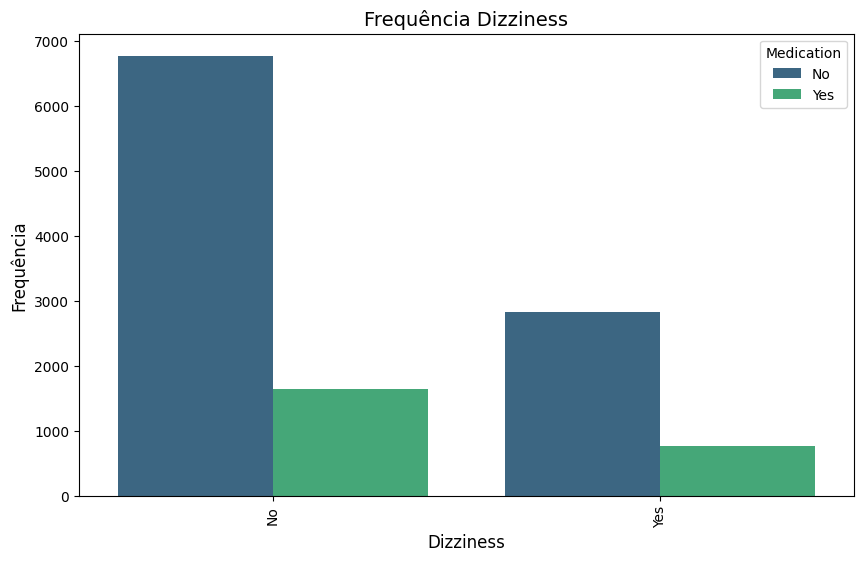

Frequência da coluna Dizziness:
  Dizziness Medication  Frequencia
0        No         No        6772
1        No        Yes        1634
2       Yes         No        2833
3       Yes        Yes         761


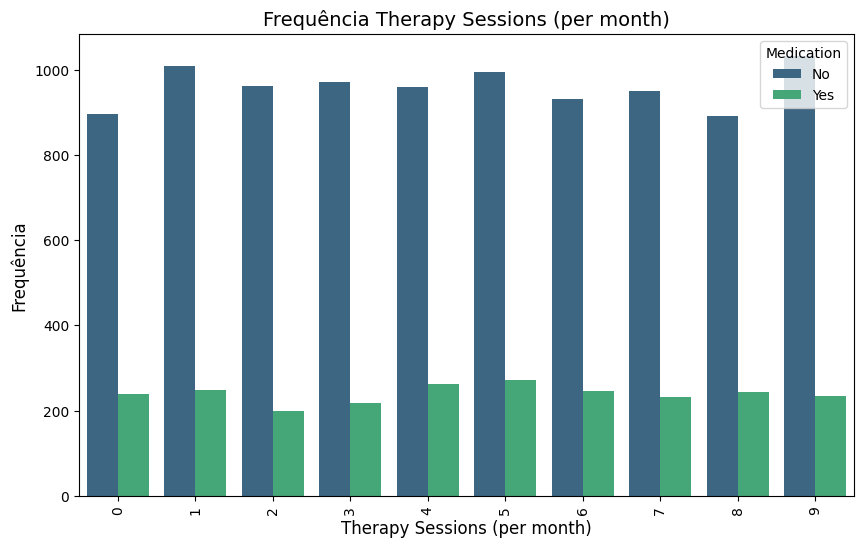

Frequência da coluna Therapy Sessions (per month):
    Therapy Sessions (per month) Medication  Frequencia
0                              0         No         897
1                              0        Yes         238
2                              1         No        1009
3                              1        Yes         249
4                              2         No         963
5                              2        Yes         199
6                              3         No         972
7                              3        Yes         218
8                              4         No         961
9                              4        Yes         262
10                             5         No         996
11                             5        Yes         273
12                             6         No         932
13                             6        Yes         247
14                             7         No         950
15                             7        Yes         2

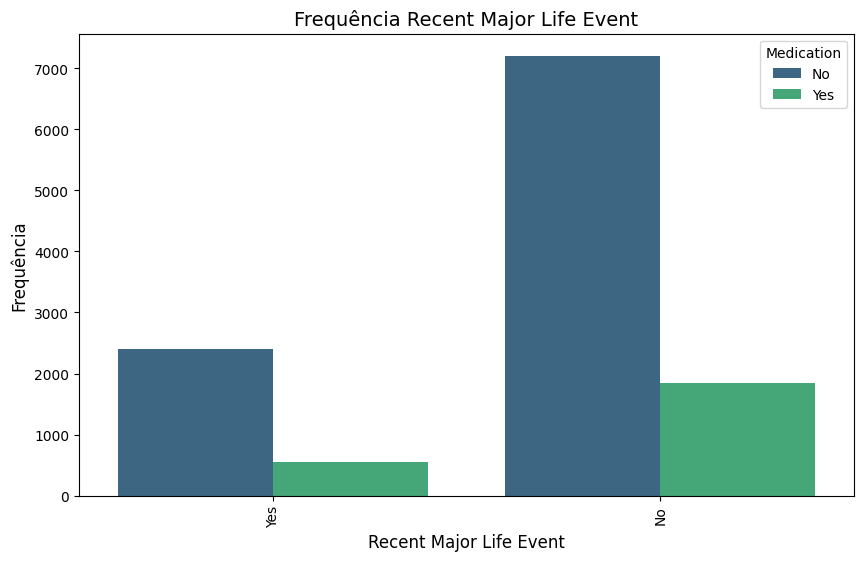

Frequência da coluna Recent Major Life Event:
  Recent Major Life Event Medication  Frequencia
0                      No         No        7208
1                      No        Yes        1846
2                     Yes         No        2397
3                     Yes        Yes         549


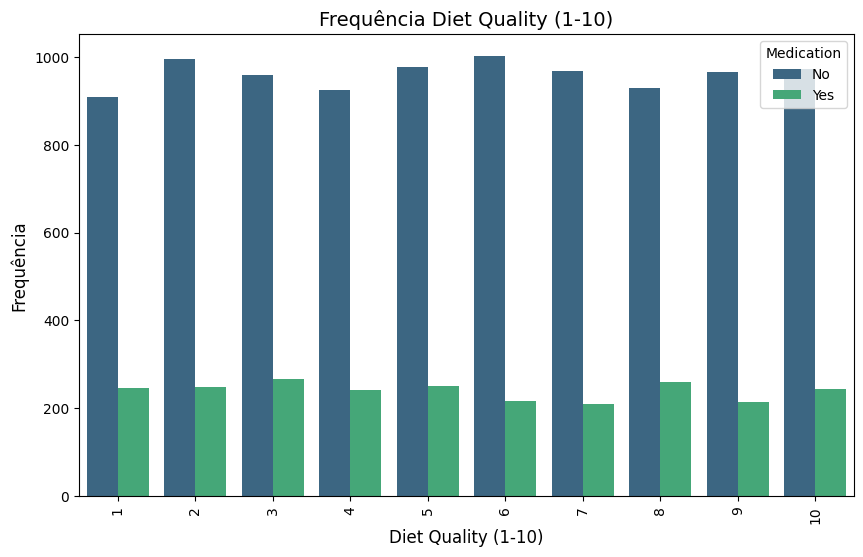

Frequência da coluna Diet Quality (1-10):
    Diet Quality (1-10) Medication  Frequencia
0                     1         No         909
1                     1        Yes         246
2                     2         No         996
3                     2        Yes         248
4                     3         No         959
5                     3        Yes         266
6                     4         No         925
7                     4        Yes         242
8                     5         No         978
9                     5        Yes         251
10                    6         No        1002
11                    6        Yes         216
12                    7         No         969
13                    7        Yes         209
14                    8         No         929
15                    8        Yes         259
16                    9         No         966
17                    9        Yes         215
18                   10         No         972
19                

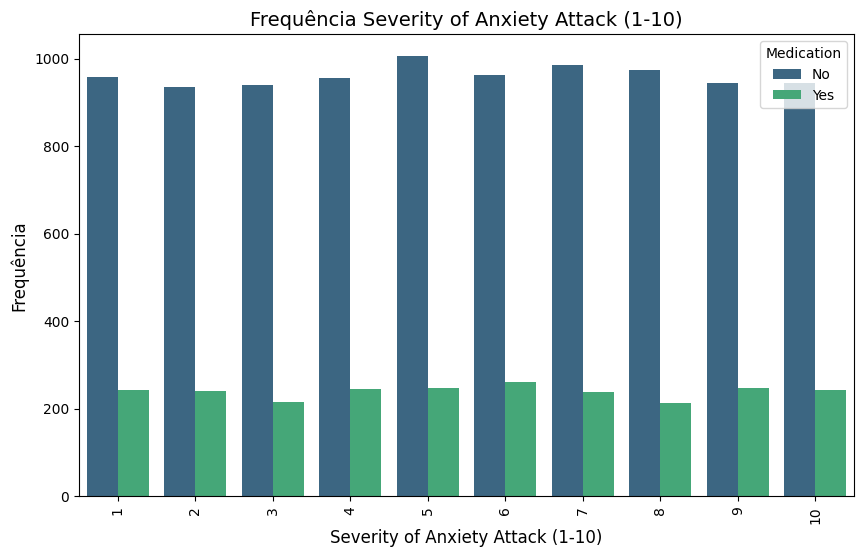

Frequência da coluna Severity of Anxiety Attack (1-10):
    Severity of Anxiety Attack (1-10) Medication  Frequencia
0                                   1         No         959
1                                   1        Yes         242
2                                   2         No         935
3                                   2        Yes         240
4                                   3         No         939
5                                   3        Yes         216
6                                   4         No         956
7                                   4        Yes         246
8                                   5         No        1006
9                                   5        Yes         248
10                                  6         No         963
11                                  6        Yes         261
12                                  7         No         985
13                                  7        Yes         239
14                           

In [7]:
for coluna in df.columns:
    # Vamos pular as colunas 'Heart Rate (bpm during attack)' e 'Caffeine Intake (mg/day)'
    if coluna == 'Heart Rate (bpm during attack)' or coluna == 'Caffeine Intake (mg/day)' or coluna == 'Medication':
        continue

    # Plotando o gráfico de barras com 'hue' para visualizar as categorias
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, hue='Medication', palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=90)  # Ajuste do ângulo do eixo X
    plt.show()

    # Calcular as frequências agrupadas por coluna e 'Alzheimer’s Diagnosis'
    qtd = df.groupby([coluna, 'Medication']).size().reset_index(name='Frequencia')
    
    # Exibir a tabela de frequências
    print(f'Frequência da coluna {coluna}:')
    print(qtd)

# ML
Nosso modelo vai tentar prever a coluna 19 Severity of Anxiety Attack (1-10).


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from xgboost import XGBRegressor

In [9]:
# 1. Separar as variáveis independentes (features) e a variável dependente (target)

X = df.drop(columns=["Severity of Anxiety Attack (1-10)"])  # X com as variáveis independentes
y = df["Severity of Anxiety Attack (1-10)"]  # y com a variável dependente

In [10]:
# 1.1. Normalização dos dados
# Exemplo: Normalização de variáveis numéricas (como 'Age' e 'Cognitive Test Score')
scaler = StandardScaler()

In [11]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ]
)

# Modelos de Regressão
regressor_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

regressor_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

regressor_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

regressor_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

regressor_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(random_state=42, max_iter=1000))
])


In [13]:
# Configurações do GridSearchCV para encontrar os melhores hiperparâmetros

param_grid_lr = {}

# Random Forest
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5],
}

# Árvore de Decisão
param_grid_dt = {
    'regressor__max_depth': [5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': [None, 'auto', 'sqrt', 'log2']
}

# XGBoost
param_grid_xgb = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Rede Neural
param_grid_nn = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__solver': ['adam', 'sgd'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__learning_rate': ['constant', 'adaptive']
}


In [14]:
# Função para realizar o GridSearchCV e avaliar os resultados
def grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model, grid_search.best_params_

# Modelos a serem testados
models = [
    ('Random Forest', regressor_rf, param_grid_rf),
    ('Regressão Linear', regressor_lr, param_grid_lr),
    ('Árvore de Decisão', regressor_dt, param_grid_dt),
    ('XGBoost', regressor_xgb, param_grid_xgb),
    ('Rede Neural', regressor_nn, param_grid_nn)
]

# Avaliar todos os modelos
for model_name, model, param_grid in models:
    print(f'\nIniciando Grid Search para {model_name}...')
    best_model, best_params = grid_search(model, param_grid, X_train, y_train)
    
    # Avaliar o modelo
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Melhores hiperparâmetros para {model_name}: {best_params}")
    print(f"Erro Quadrático Médio (MSE) para {model_name}: {mse:.4f}")
    print(f"Erro Absoluto Médio (MAE) para {model_name}: {mae:.4f}")



Iniciando Grid Search para Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhores hiperparâmetros para Random Forest: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Erro Quadrático Médio (MSE) para Random Forest: 8.1706
Erro Absoluto Médio (MAE) para Random Forest: 2.4717

Iniciando Grid Search para Regressão Linear...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros para Regressão Linear: {}
Erro Quadrático Médio (MSE) para Regressão Linear: 8.1651
Erro Absoluto Médio (MAE) para Regressão Linear: 2.4722

Iniciando Grid Search para Árvore de Decisão...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores hiperparâmetros para Árvore de Decisão: {'regressor__max_depth': 5, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Erro Quadrático Médio (MSE) para Árvore de Decisão: 8.2071
Erro Absoluto Médio (M

In [15]:
# Definindo os pipelines com os melhores parâmetros já conhecidos

# Random Forest com parâmetros já otimizados
regressor_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42))
])

# Árvore de Decisão com parâmetros já otimizados
regressor_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42))
])

# XGBoost com parâmetros já otimizados
regressor_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(learning_rate=0.01, n_estimators=50, max_depth=3, subsample=0.8, colsample_bytree=1.0, random_state=42))
])

# Rede Neural com parâmetros já otimizados
regressor_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='sgd', alpha=0.001, learning_rate='constant', max_iter=1000, random_state=42))
])


In [16]:
# Lista dos modelos
models = [
    ('Random Forest', regressor_rf),
    ('Árvore de Decisão', regressor_dt),
    ('XGBoost', regressor_xgb),
    ('Rede Neural', regressor_nn)
]

# Avaliar todos os modelos
for model_name, model in models:
    print(f'\nIniciando avaliação para {model_name}...')
    
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Avaliar o modelo
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Exibindo os resultados
    print(f"Erro Quadrático Médio (MSE) para {model_name}: {mse:.4f}")
    print(f"Erro Absoluto Médio (MAE) para {model_name}: {mae:.4f}")
    
    # Cross-validation para o modelo
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-validation MSE médio para {model_name}: {-cv_scores.mean():.4f}")



Iniciando avaliação para Random Forest...
Erro Quadrático Médio (MSE) para Random Forest: 8.1706
Erro Absoluto Médio (MAE) para Random Forest: 2.4717
Cross-validation MSE médio para Random Forest: 8.2269

Iniciando avaliação para Árvore de Decisão...
Erro Quadrático Médio (MSE) para Árvore de Decisão: 8.2071
Erro Absoluto Médio (MAE) para Árvore de Decisão: 2.4734
Cross-validation MSE médio para Árvore de Decisão: 8.2807

Iniciando avaliação para XGBoost...
Erro Quadrático Médio (MSE) para XGBoost: 8.1235
Erro Absoluto Médio (MAE) para XGBoost: 2.4728
Cross-validation MSE médio para XGBoost: 8.1754

Iniciando avaliação para Rede Neural...
Erro Quadrático Médio (MSE) para Rede Neural: 8.9300
Erro Absoluto Médio (MAE) para Rede Neural: 2.5562
Cross-validation MSE médio para Rede Neural: 9.1762
